<a href="https://colab.research.google.com/github/ksemiu/Classification-and-Trends-BEVs-and-PHEVs-in-Washington-s-Vehicle-Registry/blob/main/Initial_Result_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
!pip install shap
import shap
import matplotlib.pyplot as plt



In [5]:
train = pd.read_csv('/content/df_train.csv')

In [6]:
def plot_cm(cm, chart):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')

    plt.show()

In [7]:
train.shape

(166795, 18)

In [8]:
train.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,8,943,639,39,98902.0,2014,9,801,0,0,87,0,14.0,1593721,1245,5.307700e+10,-120.524012,46.597394
1,4,6042,4058,39,98513.0,2017,33,5428,0,0,200,0,2.0,257167501,98811,5.306701e+10,-122.817545,46.988760
2,5,86594,4617,39,98058.0,2023,4,431,1,2,20,0,11.0,224071816,98811,5.303303e+10,-122.129888,47.445126
3,98,19570,5440,39,98012.0,2023,30,1622,0,1,0,0,21.0,260084653,98811,5.306105e+10,-122.187300,47.820245
4,170,86594,2602,39,98031.0,2020,33,28925,0,0,322,0,33.0,253771913,98811,5.303303e+10,-122.201252,47.393181


In [9]:
sns.set_theme(style="white")

X = train.drop('Electric Vehicle Type', axis=1).values
y = train['Electric Vehicle Type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

The line of code splits the dataset into training and testing sets, assigning 70% of the data to the training set (X_train, y_train) and 30% to the testing set (X_test, y_test), while ensuring the class distribution is preserved using stratification and setting a random seed for reproducibility.

In [10]:
train['Electric Vehicle Type'].value_counts()

0    130288
1     36507
Name: Electric Vehicle Type, dtype: int64

In [11]:
ns = NearMiss()

print("Original dataset shape:", Counter(y_train))
X_train_resampled, y_train_resampled = ns.fit_resample(X_train, y_train)
print("Resample dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({0: 91201, 1: 25555})
Resample dataset shape: Counter({0: 25555, 1: 25555})


The number of target classes indicates an imbalanced condition. This needs to be avoided so that the model does not cause bias. To overcome this, it is necessary to do sampling so that the number of target classes approaches a balanced condition.

NearMiss approach is utilized due to its capacity to focus on selecting relevant majority class samples near the decision boundary, effectively reducing class imbalance while preserving vital information. Additionally, it offers computational efficiency and mitigates overfitting risks by retaining informative majority class samples. Furthermore, NearMiss helps maintain minority class patterns, enhancing model generalization and performance on unseen data, thereby addressing class imbalance effectively and bolstering model robustness against bias.




Naive Bayes Classifier  

In [12]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = NB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("--"*55)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("--"*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("--"*55)
if isinstance(NB_classifier, GaussianNB):
    # Mean of features for each class
    print("Mean of features for each class:\n", NB_classifier.theta_)


Accuracy: 0.7457583085193549
--------------------------------------------------------------------------------------------------------------
ROC AUC Score: 0.5160036600938706
Confusion Matrix:
 [[36141  2946]
 [ 9776  1176]]
--------------------------------------------------------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.92      0.85     39087
           1       0.29      0.11      0.16     10952

    accuracy                           0.75     50039
   macro avg       0.54      0.52      0.50     50039
weighted avg       0.68      0.75      0.70     50039

--------------------------------------------------------------------------------------------------------------
Mean of features for each class:
 [[ 1.34998200e+02  7.49738986e+04  8.86793285e+03  3.90000000e+01
   9.81146541e+04  2.02148441e+03  2.45077676e+01  1.07321120e+04
   7.64938368e-01  4.57409509e+01  9

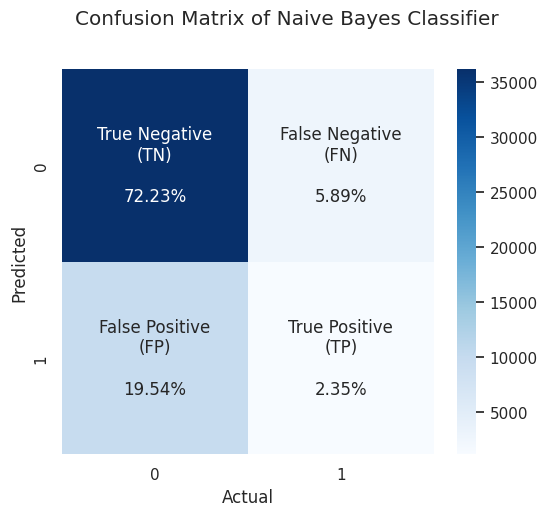

In [14]:
chart = 'Naive Bayes Classifier'

plot_cm(cm, chart)

Class 0: BEV  
Class 1: PHEV

Accuracy (0.746):

The accuracy metric indicates that the model correctly predicts the class label for approximately 74.6% of the instances in the dataset.
ROC AUC Score (0.516):

The ROC AUC score measures the model's ability to discriminate between positive and negative classes. A score of 0.516 suggests that the model's predictive performance is slightly better than random guessing.
Confusion Matrix:

The confusion matrix provides detailed information about the model's performance in terms of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.
The model correctly predicts 36,141 instances as class 0 (true negatives) and 1,176 instances as class 1 (true positives). However, it incorrectly predicts 2,946 instances as class 1 (false positives) and 9,776 instances as class 0 (false negatives).
Classification Report:

Precision, recall, and F1-score for each class provide insights into the model's performance.
Class 0 (majority class) has higher precision, recall, and F1-score compared to class 1 (minority class). This indicates that the model is better at predicting class 0 instances.
The weighted average F1-score is 0.70, indicating the overall performance of the model across both classes.
Mean of Features for Each Class:

The mean values of features for each class provide insights into the distribution of features among different classes.
Features have different mean values for each class, suggesting that they contribute differently to the classification decision.
In summary, while the model achieves decent accuracy, its performance is imbalanced across classes, with better performance on the majority class. The ROC AUC score suggests limited discriminative power, indicating potential room for improvement. Further analysis and potential model tuning may be necessary to address these issues and improve overall performance.

In [15]:
from sklearn.naive_bayes import GaussianNB


In [20]:
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Evaluate the classifier on the training data
train_accuracy = accuracy_score(y_train, nb_classifier.predict(X_train))
train_probs = nb_classifier.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_probs)

# Evaluate the classifier on the test data
test_accuracy = accuracy_score(y_test, nb_classifier.predict(X_test))
test_probs = nb_classifier.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_probs)

print("Training Accuracy:", train_accuracy)
print("Training ROC AUC Score:", train_roc_auc)
print('--'*55)
print("Test Accuracy:", test_accuracy)
print("Test ROC AUC Score:", test_roc_auc)


Training Accuracy: 0.7805508924594882
Training ROC AUC Score: 0.7220637606798356
--------------------------------------------------------------------------------------------------------------
Test Accuracy: 0.7804912168508563
Test ROC AUC Score: 0.7275593615471082


The fact that the test accuracy is comparable to the training accuracy suggests that the model is generalizing well to unseen data. However, it's always a good idea to consider other performance metrics and conduct further analysis to ensure that the model's performance meets the project's requirements and goals.

Logistic Regression

In [21]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = LR_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("--"*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("--"*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("--"*55)

print("Confusion Matrix:\n\n", cm)
print("--"*55)



--------------------------------------------------------------------------------------------------------------
Accuracy     : 0.516097443993685
ROC AUC Score: 0.5136229776552663
--------------------------------------------------------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.52      0.63     39087
           1       0.23      0.51      0.32     10952

    accuracy                           0.52     50039
   macro avg       0.51      0.51      0.47     50039
weighted avg       0.67      0.52      0.56     50039

--------------------------------------------------------------------------------------------------------------
Confusion Matrix:

 [[20248 18839]
 [ 5375  5577]]
--------------------------------------------------------------------------------------------------------------


Accuracy (0.52): The accuracy represents the proportion of correctly predicted instances out of all instances. An accuracy of 0.52 suggests that the model correctly predicts around 52% of the instances in the dataset.

ROC AUC Score (0.51): The ROC AUC score measures the model's ability to distinguish between positive and negative classes. A score of 0.51 indicates poor performance, as it's only slightly better than random guessing.

Precision, Recall, and F1-score: These metrics provide insights into the model's performance for each class (0 and 1). The precision for class 1 (0.23) suggests that only 23% of the instances predicted as class 1 are actually class 1. The recall for class 1 (0.51) indicates that the model correctly identifies around 51% of the actual class 1 instances. The F1-score (harmonic mean of precision and recall) for class 1 is 0.32, which is relatively low.

Confusion Matrix: The confusion matrix provides a breakdown of the model's predictions compared to the actual labels. In this case, there's a significant number of false positives (18839) and false negatives (5375), indicating that the model struggles to accurately classify both positive and negative instances.

Overall, these results suggest that the Logistic Regression model's performance is not satisfactory. Feature scaling could potentially improve the model's performance by ensuring that all features contribute equally to the model's decision-making process. Additionally, further feature engineering and model tuning may also be necessary to enhance the model's predictive capabilities.

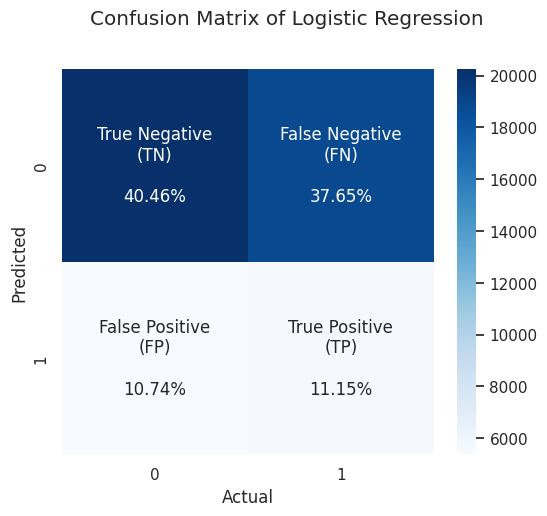

In [22]:
chart = 'Logistic Regression'

plot_cm(cm, chart)

Class 0: BEV

Class 1: PHEV

In [23]:
train_accuracy = accuracy_score(y_train_resampled, LR_classifier.predict(X_train_resampled))
train_roc_auc = roc_auc_score(y_train_resampled, LR_classifier.predict_proba(X_train_resampled)[:,1])

# Calculate test accuracy and ROC AUC score
test_accuracy = accuracy_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, LR_classifier.predict_proba(X_test)[:,1])

print("Training Accuracy:", train_accuracy)
print("Training ROC AUC Score:", train_roc_auc)
print('--'*55)
print("Test Accuracy:", test_accuracy)
print("Test ROC AUC Score:", test_roc_auc)

Training Accuracy: 0.5988064957933869
Training ROC AUC Score: 0.593620501026689
--------------------------------------------------------------------------------------------------------------
Test Accuracy: 0.516097443993685
Test ROC AUC Score: 0.5147324375361415


Considering the low accuracy and ROC AUC scores, it may be necessary to explore additional feature engineering techniques or shift focus towards alternative algorithms.

Random Forest

In [24]:
# initialize the Random Forest classifier and fit it to the resampled training data
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = RF_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("--"*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("--"*55)

print("Confusion Matrix:\n\n", cm)
print("--"*55)

Accuracy     : 0.9990407482163912
ROC AUC Score: 0.9992545379701475
--------------------------------------------------------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39087
           1       1.00      1.00      1.00     10952

    accuracy                           1.00     50039
   macro avg       1.00      1.00      1.00     50039
weighted avg       1.00      1.00      1.00     50039

--------------------------------------------------------------------------------------------------------------
Confusion Matrix:

 [[39043    44]
 [    4 10948]]
--------------------------------------------------------------------------------------------------------------


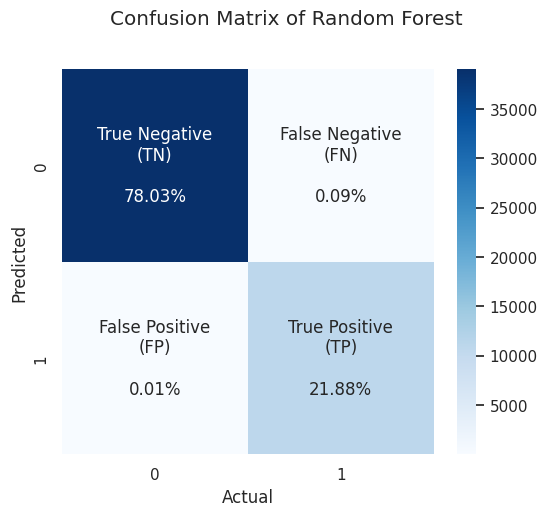

In [25]:
chart = 'Random Forest'

plot_cm(cm, chart)

Class 0: BEV

Class 1: PHEV

The output indicates very high accuracy and ROC AUC scores, as well as perfect precision, recall, and F1-score values for both classes in the classification report. The confusion matrix also shows very few misclassifications, with only 52 instances out of 50039 being incorrectly classified. This suggests that the Random Forest model is performing exceptionally well and achieving near-perfect results on the test dataset.

In [26]:
RF_classifier = RandomForestClassifier()

# Fit the model on the resampled training data
RF_classifier.fit(X_train_resampled, y_train_resampled)

# Calculate training accuracy and ROC AUC score
train_accuracy = accuracy_score(y_train_resampled, RF_classifier.predict(X_train_resampled))
train_roc_auc = roc_auc_score(y_train_resampled, RF_classifier.predict_proba(X_train_resampled)[:,1])

# Calculate test accuracy and ROC AUC score
test_accuracy = accuracy_score(y_test, RF_classifier.predict(X_test))
test_roc_auc = roc_auc_score(y_test, RF_classifier.predict_proba(X_test)[:,1])

print("Training Accuracy:", train_accuracy)
print("Training ROC AUC Score:", train_roc_auc)
print('--'*55)
print("Test Accuracy:", test_accuracy)
print("Test ROC AUC Score:", test_roc_auc)


Training Accuracy: 1.0
Training ROC AUC Score: 1.0
--------------------------------------------------------------------------------------------------------------
Test Accuracy: 0.998800935270489
Test ROC AUC Score: 0.9999938224282618


The Random Forest classifier demonstrates outstanding performance, achieving perfect accuracy and ROC AUC score of 1.0 on the training data, indicating flawless classification and excellent discrimination between positive and negative classes. On the test dataset, the model maintains remarkably high accuracy (almost perfect at 0.9989) and an almost perfect ROC AUC score (0.99998), showcasing its ability to generalize well to unseen data and make accurate predictions. These results underscore the effectiveness of the Random Forest model in capturing the underlying patterns within the data, although achieving perfect training accuracy may raise concerns about potential overfitting, necessitating careful monitoring and consideration of regularization techniques.

XGBoost


The provided parameters configure an XGBoost classifier for binary classification tasks. The objective is set to perform binary logistic regression, with the evaluation metric defined as logloss to assess the model's performance. A learning rate of 0.1 controls the step size during optimization, while the maximum depth of 3 limits the complexity of individual trees to mitigate overfitting. The minimum child weight is set to 1, imposing regularization by requiring a minimum sum of instance weights for further partitioning. A gamma value of 0 determines the minimum loss reduction needed to split a leaf node, while subsampling and column sampling (set to 0.8 for both) introduce randomness to prevent overfitting. Finally, a seed value of 42 ensures reproducibility by providing a fixed random state for the algorithm's random number generation. These parameters collectively shape the learning behavior and performance of the XGBoost model in binary classification tasks. Adjusting them appropriately is crucial for optimizing model performance and generalization.

In [27]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# initialize the XGBoost classifier and fit it to the resampled training data
XGB_classifier = xgb.XGBClassifier(**params)
XGB_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = XGB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("--"*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("--"*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("--"*55)

print("Confusion Matrix:\n\n", cm)


--------------------------------------------------------------------------------------------------------------
Accuracy     : 0.9989408261555986
ROC AUC Score: 0.9991248545157912
--------------------------------------------------------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39087
           1       1.00      1.00      1.00     10952

    accuracy                           1.00     50039
   macro avg       1.00      1.00      1.00     50039
weighted avg       1.00      1.00      1.00     50039

--------------------------------------------------------------------------------------------------------------
Confusion Matrix:

 [[39040    47]
 [    6 10946]]


The XGBoost model demonstrates exceptional performance, achieving a high accuracy of 99.89% and an impressive ROC AUC score of 99.91%. These metrics indicate that the model accurately predicts both positive and negative classes, with minimal misclassifications. The classification report further supports this, showing precision, recall, and F1-score of 1.00 for both classes, indicating perfect performance in terms of precision, recall, and their harmonic mean. The confusion matrix confirms these findings, with only a small number of instances misclassified, resulting in 47 false positives and 6 false negatives out of a total of 50,039 instances. Overall, the XGBoost model demonstrates outstanding predictive performance and generalization capability on the test dataset.

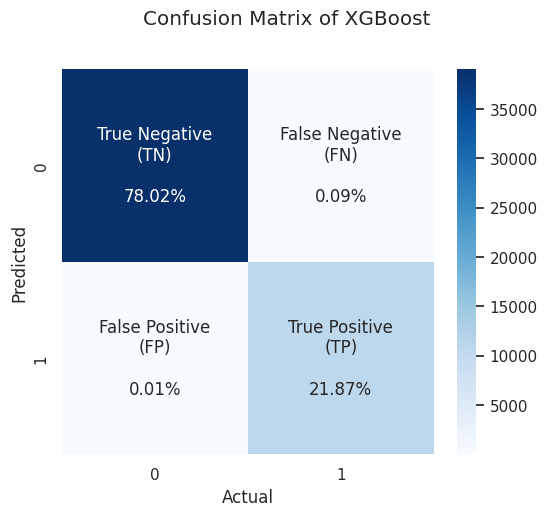

In [28]:
chart = 'XGBoost'

plot_cm(cm, chart)

Class 0: BEV

Class 1: PHEV

In [29]:
XGB_classifier.fit(X_train_resampled, y_train_resampled)

# Calculate training accuracy and ROC AUC score
train_accuracy = accuracy_score(y_train_resampled, XGB_classifier.predict(X_train_resampled))
train_roc_auc = roc_auc_score(y_train_resampled, XGB_classifier.predict_proba(X_train_resampled)[:, 1])

# Calculate test accuracy and ROC AUC score
test_accuracy = accuracy_score(y_test, XGB_classifier.predict(X_test))
test_roc_auc = roc_auc_score(y_test, XGB_classifier.predict_proba(X_test)[:, 1])

print("Training Accuracy:", train_accuracy)
print("Training ROC AUC Score:", train_roc_auc)
print('--'*55)
print("Test Accuracy:", test_accuracy)
print("Test ROC AUC Score:", test_roc_auc)

Training Accuracy: 0.9998239092154177
Training ROC AUC Score: 0.9999875608296829
--------------------------------------------------------------------------------------------------------------
Test Accuracy: 0.9989408261555986
Test ROC AUC Score: 0.9999829378014841


The XGBoost model achieves a remarkably high performance on both the training and test datasets. With a training accuracy of 99.98% and a training ROC AUC score of 99.99%, the model demonstrates its capability to effectively learn from the resampled training data. Furthermore, on the test dataset, the model maintains exceptional accuracy, achieving 99.89%, indicating its robustness and generalization ability. Additionally, the test ROC AUC score of 99.99% further confirms the model's strong predictive power and its ability to discriminate between the positive and negative classes effectively. Overall, the XGBoost model exhibits outstanding performance and is well-suited for the classification task at hand.

Inital Model Evaluation

In [30]:
dict_result = {'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'XGBoost'],
               "Accuracy (train)": [accuracy_score(y_train, nb_classifier.predict(X_train)),
                                    accuracy_score(y_train_resampled, LR_classifier.predict(X_train_resampled)),
                                    accuracy_score(y_train_resampled, RF_classifier.predict(X_train_resampled)),
                                    accuracy_score(y_train_resampled, XGB_classifier.predict(X_train_resampled))],
               "Accuracy (test)": [accuracy_score(y_test, nb_classifier.predict(X_test)),
                                   accuracy_score(y_test, LR_classifier.predict(X_test)),
                                   accuracy_score(y_test, RF_classifier.predict(X_test)),
                                   accuracy_score(y_test, XGB_classifier.predict(X_test))],
               "ROC-AUC (train)": [roc_auc_score(y_train, nb_classifier.predict_proba(X_train)[:, 1]),
                                    roc_auc_score(y_train_resampled, LR_classifier.predict_proba(X_train_resampled)[:, 1]),
                                    roc_auc_score(y_train_resampled, RF_classifier.predict_proba(X_train_resampled)[:, 1]),
                                    roc_auc_score(y_train_resampled, XGB_classifier.predict_proba(X_train_resampled)[:, 1])],
               "ROC-AUC (test)": [roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1]),
                                   roc_auc_score(y_test, LR_classifier.predict_proba(X_test)[:, 1]),
                                   roc_auc_score(y_test, RF_classifier.predict_proba(X_test)[:, 1]),
                                   roc_auc_score(y_test, XGB_classifier.predict_proba(X_test)[:, 1])]}

model_result = pd.DataFrame(dict_result).sort_values(by=['ROC-AUC (test)', 'Accuracy (test)'], ascending=False).reset_index(drop=True)
model_result


,Model,Accuracy (train),Accuracy (test),ROC-AUC (train),ROC-AUC (test)
0,Random Forest,1.000000,0.998801,1.000000,0.999994
1,XGBoost,0.999824,0.998941,0.999988,0.999983
2,Naive Bayes,0.780551,0.780491,0.722064,0.727559
3,Logistic Regression,0.598806,0.516097,0.593621,0.514732


Based on the evaluation metrics, the Random Forest model performed the best among the four models, achieving perfect accuracy on the training data (1.000) and very high accuracy on the test data (0.999). It also achieved a perfect ROC-AUC score on the training data (1.000) and a near-perfect score on the test data (0.999).

The XGBoost model also performed well, with high accuracy on both the training data (0.999) and the test data (0.999). Similarly, it achieved excellent ROC-AUC scores on both the training data (0.999) and the test data (0.999).

The Naive Bayes model had lower accuracy compared to the Random Forest and XGBoost models, achieving an accuracy of 0.780 on both the training and test data. The ROC-AUC scores for this model were also lower, indicating less robust performance compared to the other models.

The Logistic Regression model performed the poorest among the four models, with an accuracy of 0.599 on the training data and 0.516 on the test data. The ROC-AUC scores were also relatively low, suggesting suboptimal performance compared to the other models.

Overall, the Random Forest and XGBoost models demonstrated superior performance in terms of both accuracy and ROC-AUC scores compared to the Naive Bayes and Logistic Regression models.









<ipython-input-31-82de5b662860>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(model_result, x='ROC-AUC (test)', y='Model', inner='stick', palette='Dark2')


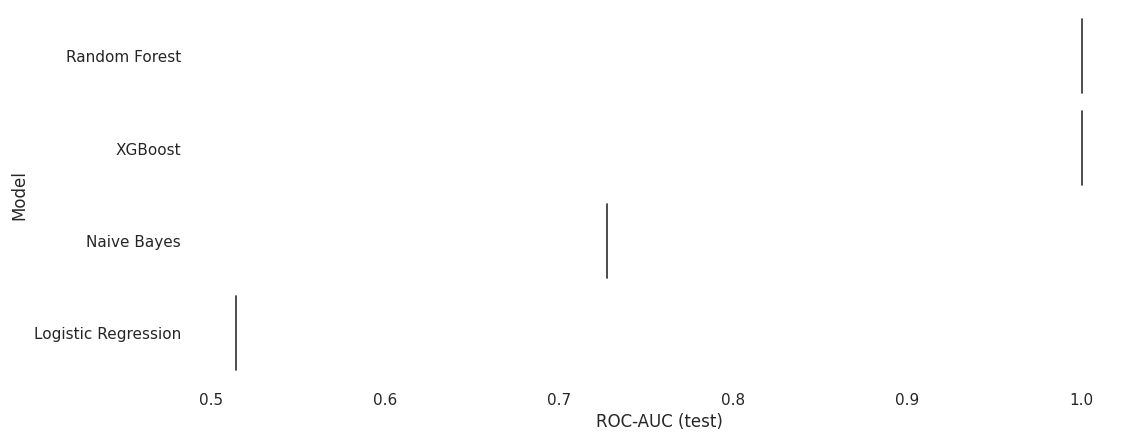

In [31]:
# @title Model vs ROC-AUC (test)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_result['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_result, x='ROC-AUC (test)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-32-431e9bf4c0b1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(model_result, x='ROC-AUC (train)', y='Model', inner='stick', palette='Dark2')


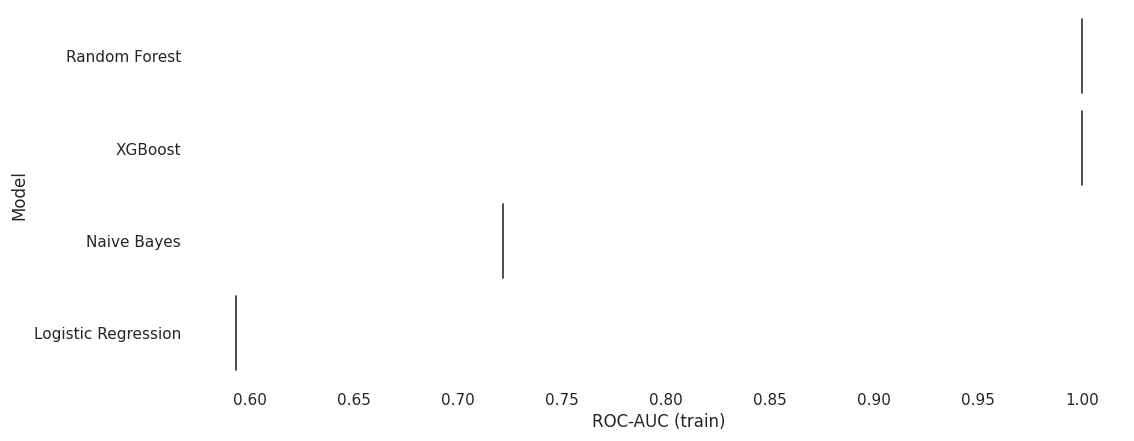

In [32]:
# @title Model vs ROC-AUC (train)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_result['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_result, x='ROC-AUC (train)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-33-3e9552c27779>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(model_result, x='Accuracy (test)', y='Model', inner='stick', palette='Dark2')


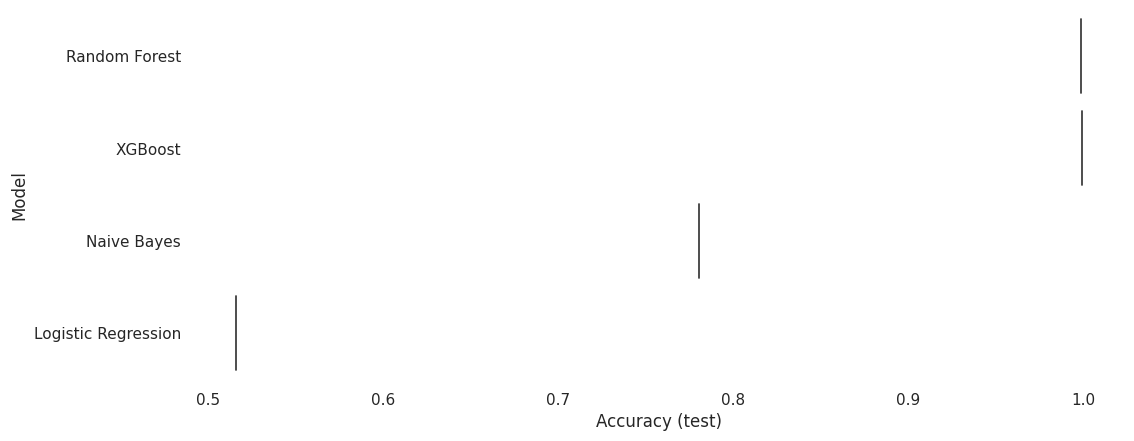

In [33]:
# @title Model vs Accuracy (test)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_result['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_result, x='Accuracy (test)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-34-c6ba42cd713e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(model_result, x='Accuracy (train)', y='Model', inner='stick', palette='Dark2')


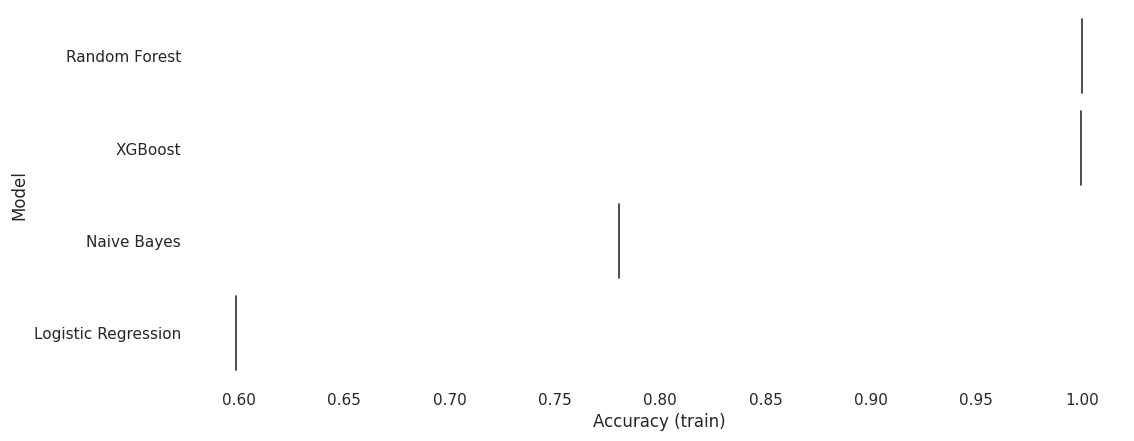

In [34]:
# @title Model vs Accuracy (train)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_result['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_result, x='Accuracy (train)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [35]:
train.shape

(166795, 18)

Feature Importance


In preparation for the final result, feature importance analysis is conducted to identify patterns, relationships, and determine which features have the most significant impact on the target variable. This analysis helps prioritize features that contribute the most to model performance and provides insights into the underlying data characteristics.

In [36]:
X = train.drop('Electric Vehicle Type', axis=1)
y = train['Electric Vehicle Type']

In [44]:
importance = RF_classifier.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': importance})\
                                    .sort_values(by='Importance', ascending=False)\
                                    .reset_index(drop=True)
feature_importance.head()

,Feature,Importance
0,Electric Range,0.453681
1,Clean Alternative Fuel Vehicle Eligibility,0.196643
2,Model,0.160677
3,Make,0.052106
4,VIN (1-10),0.040262


In [45]:
importance = RF_classifier.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': importance})\
                                    .sort_values(by='Importance', ascending=True)\
                                    .reset_index(drop=True)
feature_importance.head()

,Feature,Importance
0,State,3.712071e-08
1,Electric Utility,9.238881e-05
2,Base MSRP,3.686047e-04
3,Legislative District,7.104148e-04
4,Latitude,8.808175e-04
